In [4]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
import os
%matplotlib inline

In [ ]:
os.chdir('/Users/GanHong/Desktop')
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = misc.imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data), np.array(train_labels)
train_data.astype(float)
train_labels.astype(int)

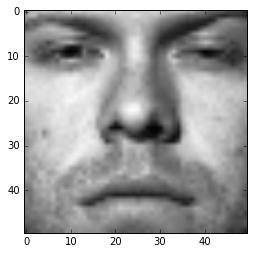

In [6]:
plt.imshow(train_data[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()

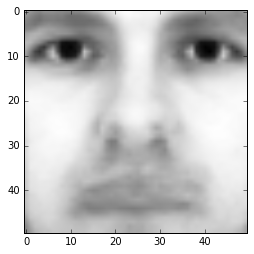

In [13]:
# computer average face from whole training set
col_mean = np.mean(train_data, axis=0)
plt.imshow(col_mean.reshape(50,50), cmap = cm.Greys_r)
plt.show()

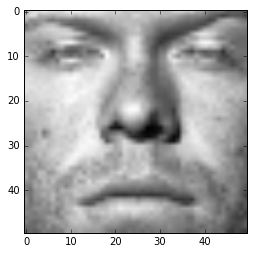

In [16]:
# subtract average face from each columon of x
aver = train_data - np.tile(col_mean, (540,1))
plt.imshow(aver[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.show()

(540, 540) (540,) (2500, 2500)


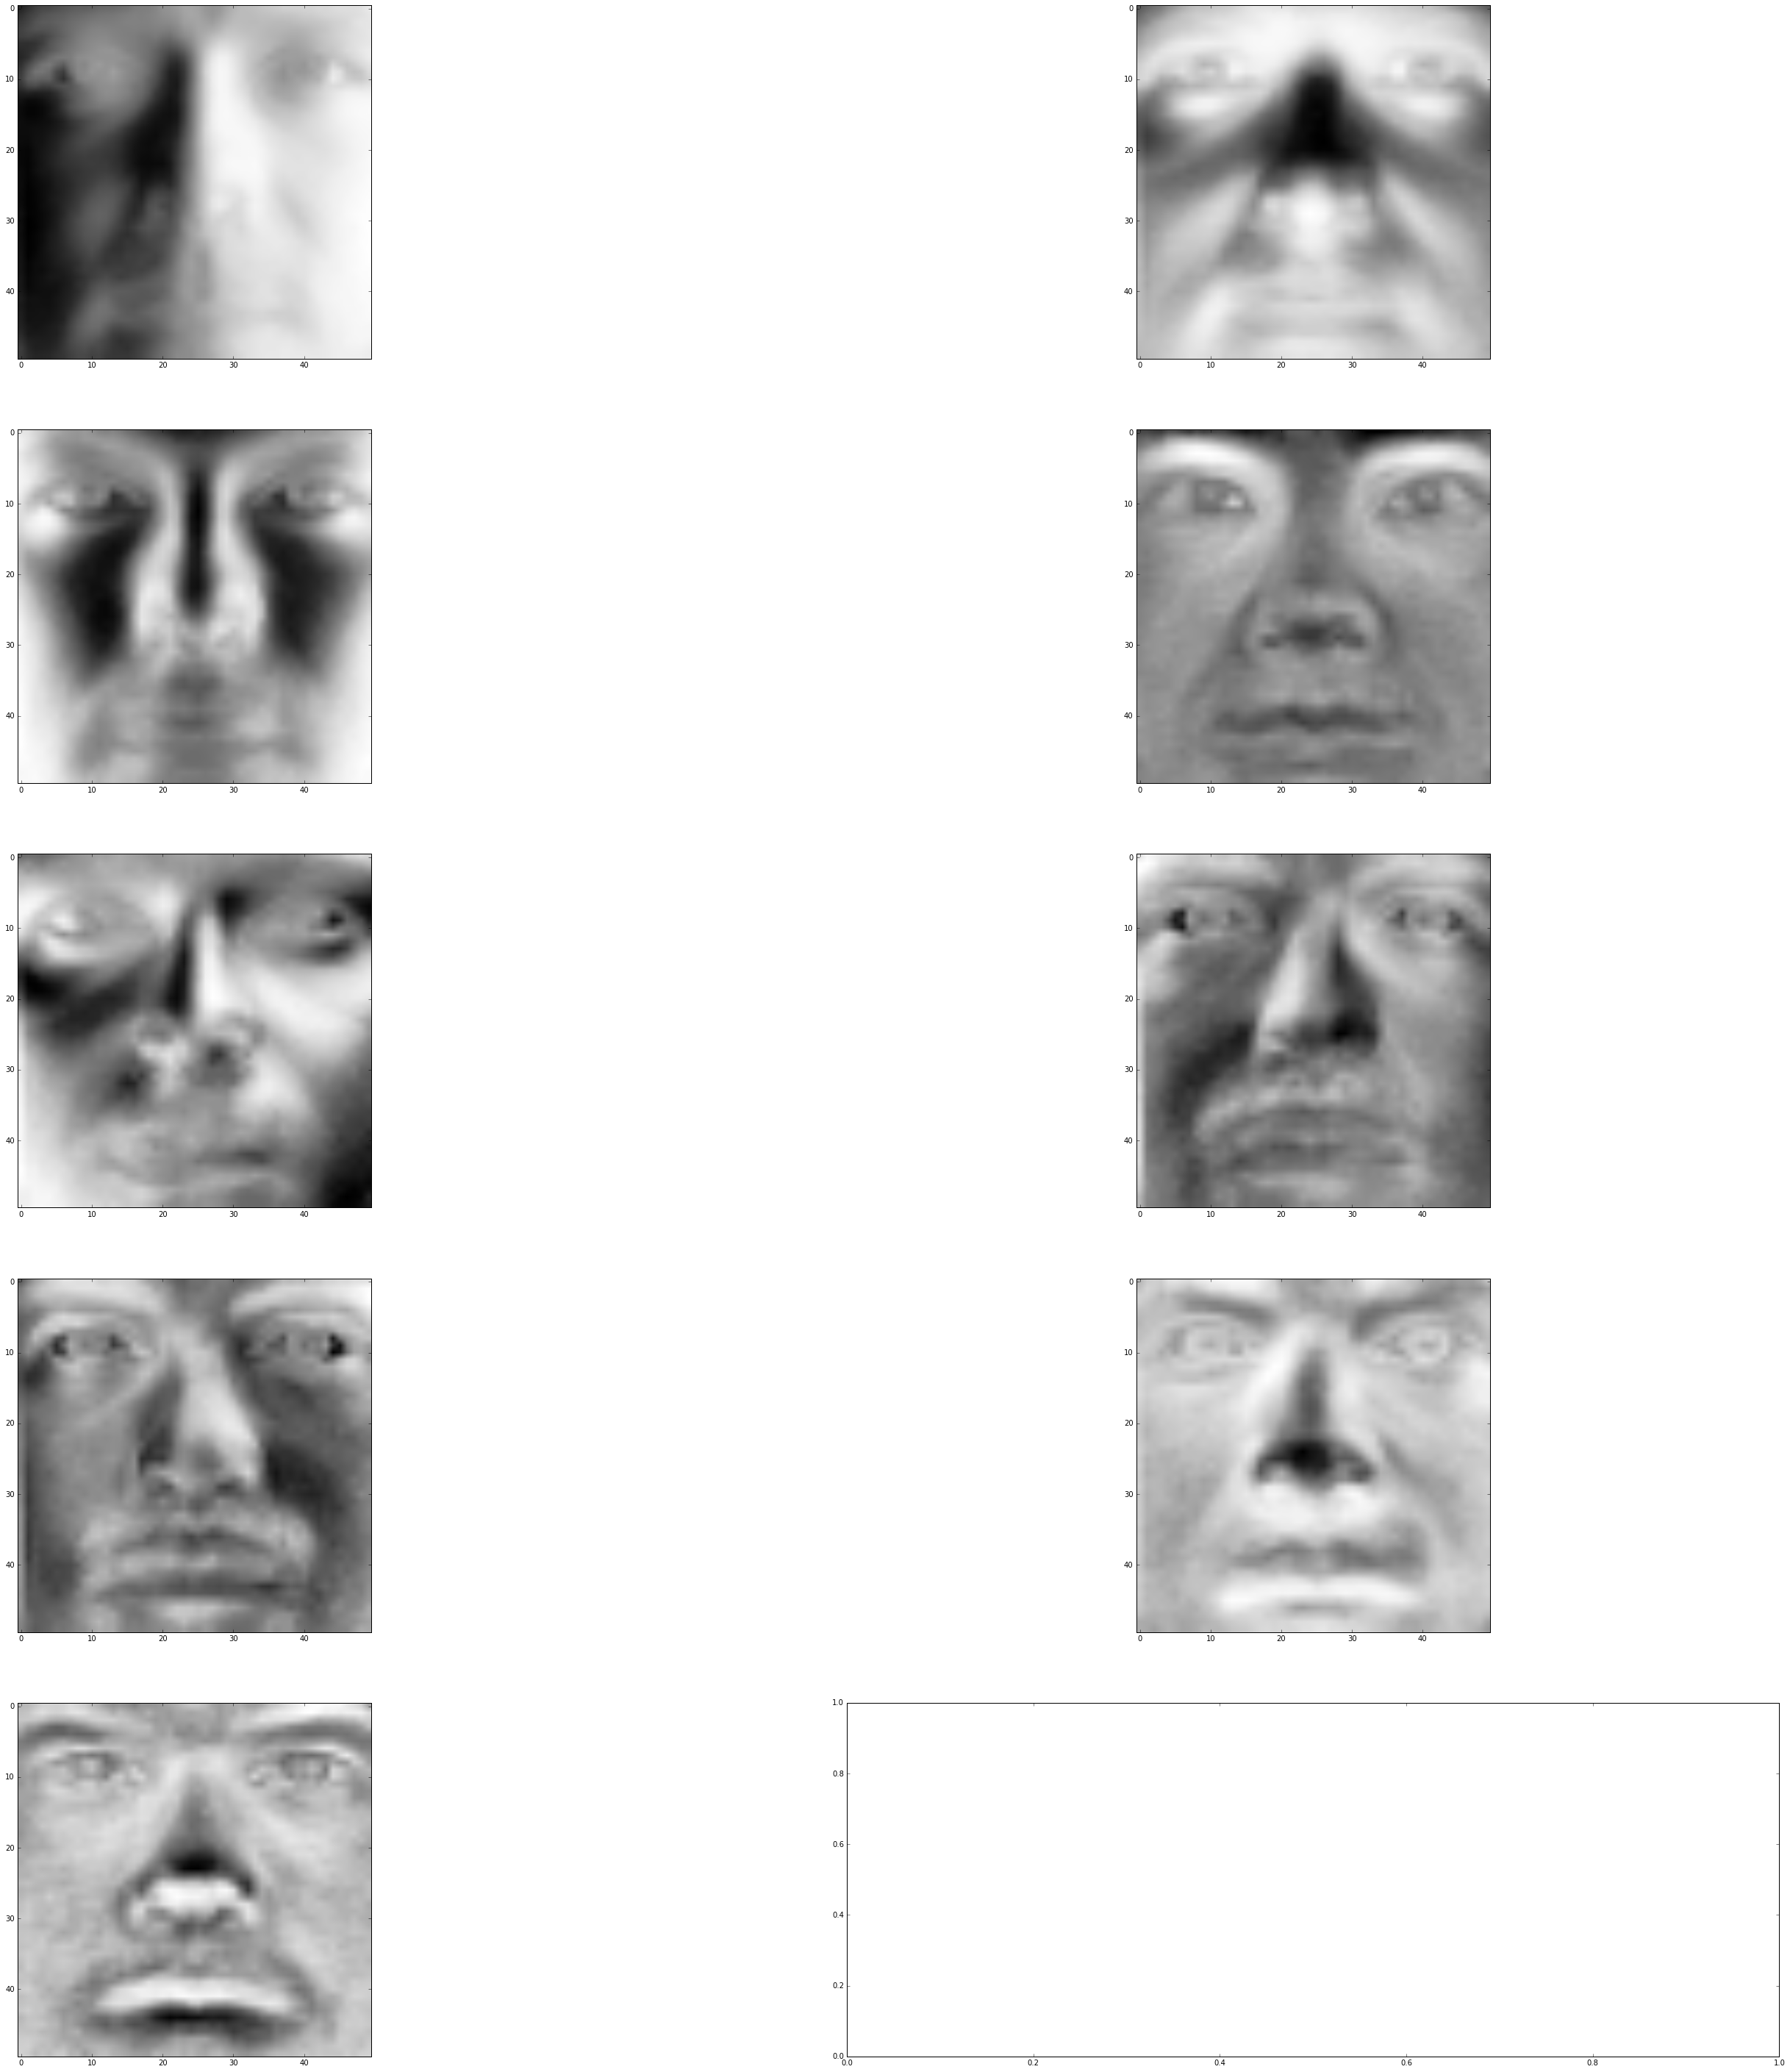

In [42]:
# Eigenface
U, S, V = np.linalg.svd(train_data, full_matrices=True)
# each row of V has same dimension 2500 as the face image
print(U.shape, S.shape, V.shape)
plt.figure(figsize=(50,50))
for i in range(10):
    plt.imshow(V[i,:].reshape(50,50), cmap = cm.Greys_r)
    plt.subplot(5,2,i+1)

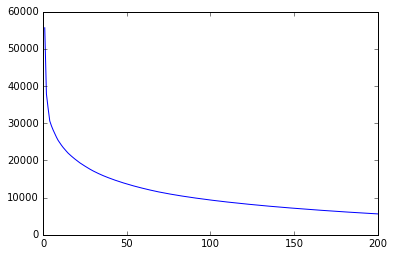

In [50]:
# low-rank Approximation
x, y = [], []
for r in range(1,201):
    iden = np.identity(r)
    for i in range(r):
        iden[i][i] = S[i]
    rank_r_X = np.dot(np.dot(U[:,:r],iden[:r,:r]),V[:r,:])
    x.append(r)
    y.append(np.linalg.norm(train_data-rank_r_X))
plt.plot(x,y)

In [79]:
# Eigenface Feature F = X*(V[:r,:]).T
def r_dimension_feature_matrix(r, X):
    U, S, V = np.linalg.svd(X, full_matrices=True)
    F = np.dot(subtract_avar(X), V[:r,:].transpose())
    return F

def subtract_avar(X):
    col_mean = np.mean(X, axis=0)
    aver = X - np.tile(col_mean, (X.shape[0],1))
    return aver

In [80]:
F_train = r_dimension_feature_matrix(2000, train_data)

ValueError: shapes (2500,2000) and (540,2500) not aligned: 2000 (dim 1) != 540 (dim 0)

In [76]:
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = misc.imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data), np.array(test_labels)
test_data.astype(float)
test_labels.astype(int)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

In [77]:
F_train = r_dimension_feature_matrix(2000, train_data)
F_test  = r_dimension_feature_matrix(2000, test_data)

In [78]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(F_train,train_labels)
logistic.score(F_test,test_labels)

0.040000000000000001